# Day 3: Text Analysis — Sentiment & Word Frequency  

In this notebook, I analyze a dataset of tweets labeled with sentiment.  
The goal is to understand:  
1. How text length varies across sentiment categories.  
2. What words are most common in positive vs. negative tweets.  

This exercise demonstrates the use of basic text preprocessing, exploratory text analysis, and frequency analysis using Python.


In [7]:
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv('Desktop/Sentiment Analysis/tweet_data.csv')

In [9]:
df.head()

,textID,tweet_text,sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative
1,1956967696,Funeral ceremony...gloomy friday...,negative
2,1956967789,wants to hang out with friends SOON!,positive
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative


In [10]:
df.columns

Index(['textID', 'tweet_text', 'sentiment'], dtype='object')

In [11]:
df.shape

(18727, 3)

In [12]:
df.info

<bound method DataFrame.info of            textID                                         tweet_text sentiment
0      1956967666  Layin n bed with a headache  ughhhh...waitin o...  negative
1      1956967696                Funeral ceremony...gloomy friday...  negative
2      1956967789               wants to hang out with friends SOON!  positive
3      1956968477  Re-pinging @ghostridah14: why didn't you go to...  negative
4      1956968636               Hmmm. http://www.djhero.com/ is down  negative
...           ...                                                ...       ...
18722  1753918818  had SUCH and AMAZING time last night, McFly we...  positive
18723  1753918881  @jasimmo Ooo showing of your French skills!! l...  positive
18724  1753918900                      Succesfully following Tayla!!  positive
18725  1753919001                     Happy Mothers Day  All my love  positive
18726  1753919005  Happy Mother's Day to all the mommies out ther...  positive

[18727 rows x 3 col

In [13]:
tweet_id=0
tweet=df.iloc[tweet_id]

In [14]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet Sentiment: {}".format(tweet["sentiment"]))

Tweet: Layin n bed with a headache  ughhhh...waitin on your call...
Tweet Sentiment: negative


In [15]:
sentiment_count=df['sentiment'].value_counts()
sentiment_count

sentiment
positive    9897
negative    8830
Name: count, dtype: int64

# Visuals of positive vs negative tweets

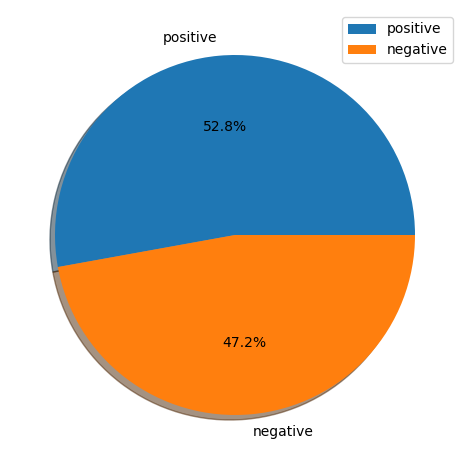

In [16]:
import matplotlib.pyplot as plt

plt.pie(
    sentiment_count, 
    labels=sentiment_count.index,  
    
    shadow=True, 
    autopct='%1.1f%%'
)
plt.legend()
plt.tight_layout()  
plt.show()


In [17]:
positive_tweets = df[df["sentiment"] == "positive"].count()
positive_tweets

textID        9897
tweet_text    9897
sentiment     9897
dtype: int64

In [18]:
negative_tweets=df[df["sentiment"]=="negative"].count()
negative_tweets

textID        8830
tweet_text    8830
sentiment     8830
dtype: int64

In [19]:
#importing world cloud
from wordcloud import WordCloud

In [20]:
pos_tweets=df[df["sentiment"]=="positive"]
txt=" ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud=WordCloud(background_color = 'white').generate(txt)


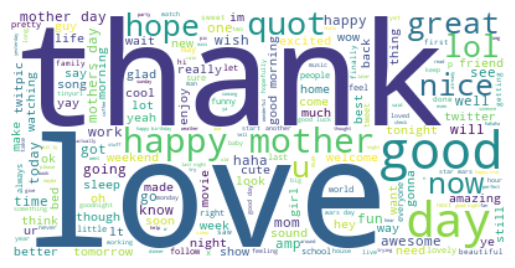

In [21]:
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [22]:
neg_tweets=df[df["sentiment"]=="negative"]
txt=" ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud=WordCloud(background_color = 'white').generate(txt)

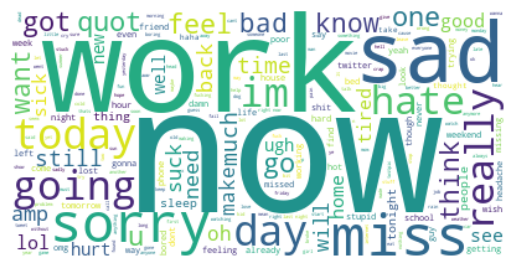

In [23]:
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [29]:
import nltk
import re  # Added import for regular expressions module
from nltk.corpus import stopwords
from collections import Counter  # Added import for Counter
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# ---- Step 1: Clean text ----
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))  # remove punctuation/numbers
    text = text.lower()                           # lowercase
    words = text.split()
    words = [w for w in words if w not in stop_words]  # remove stopwords
    return " ".join(words)

df['cleaned_text'] = df['tweet_text'].apply(clean_text)

# ---- Step 2: Word extraction by sentiment ----
positive_words = " ".join(df[df['sentiment'] == 'positive']['cleaned_text']).split()
negative_words = " ".join(df[df['sentiment'] == 'negative']['cleaned_text']).split()

# ---- Step 3: Count most common words ----
print("Top 10 Positive Words:", Counter(positive_words).most_common(10))
print("Top 10 Negative Words:", Counter(negative_words).most_common(10))

Top 10 Positive Words: [('day', 1429), ('good', 1205), ('love', 1013), ('happy', 1001), ('im', 831), ('mothers', 756), ('thanks', 667), ('great', 536), ('like', 462), ('hope', 443)]
Top 10 Negative Words: [('im', 1404), ('like', 533), ('cant', 522), ('dont', 520), ('get', 488), ('miss', 487), ('go', 446), ('sad', 445), ('work', 436), ('sorry', 381)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


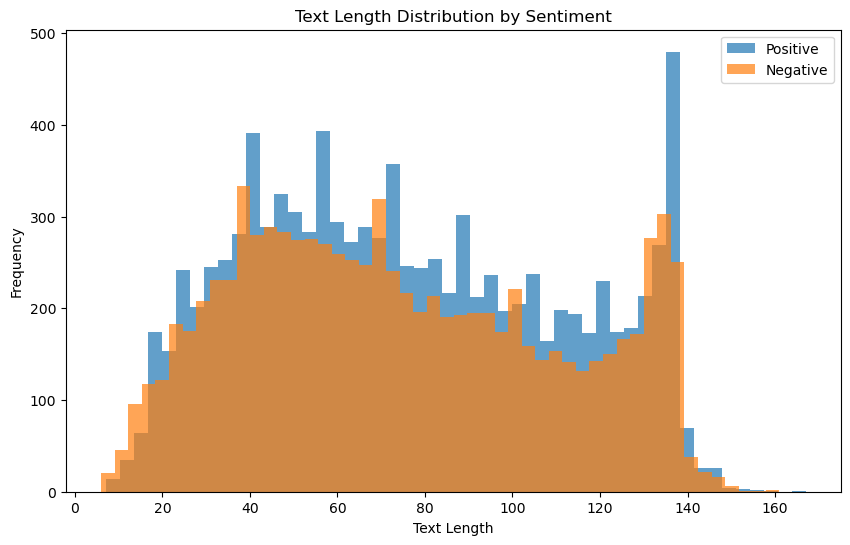

In [30]:
# Text length distribution by sentiment
plt.figure(figsize=(10, 6))
df[df['sentiment']=='positive']['text_length'].plot(
    kind='hist', bins=50, alpha=0.7, label='Positive'
)
df[df['sentiment']=='negative']['text_length'].plot(
    kind='hist', bins=50, alpha=0.7, label='Negative'
)
plt.legend()
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Text Length')
plt.show()

# Conclusion  

- Text length varies slightly across sentiments, but not strongly enough to predict sentiment alone.  
- Word frequency analysis reveals clear sentiment patterns:
  - Positive tweets highlight joy, appreciation, and optimism.  
  - Negative tweets emphasize complaints, anger, and dissatisfaction.  

This exercise demonstrates the power of simple NLP techniques. It sets the foundation for more advanced sentiment analysis (TF-IDF, classification models, or deep learning).
